In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True

data = pd.read_csv("synthetic_reviews_200_people.csv")

print(data.head())
print(data.info())


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
zsh:1: command not found: python
   reviewer_id reviewer_name  reviewer_age reviewer_city  \
0            1  Jordan Patel            33       Bristol   
1            2   Jamie Smith            20       Cardiff   
2            3   Alex Taylor            63         Leeds   
3            4   Alex Garcia            39       Cardiff   
4            5   Casey Smith            40       Glasgow   

                                        reviews.text  reviews.rating  \
0  I was disappointed with this non-stick pan I b...               1   
1  I was disappointed with this wireless headphon...               2   
2  I was disappointed with this conditioner I bou...               2   
3  I was disappointed with this python for beginn...               2   
4  I was disappointed with this football I bought...               1   

   reviews.doRecommend reviews.date      categories             

In [7]:
def analyze_sentiment(x):
    score = TextBlob(x).sentiment.polarity
    return "Positive" if score > 0 else "Negative" if score < 0 else "Neutral"

data["sentiment"] = data["reviews.text"].apply(analyze_sentiment)
data["sentiment_score"] = data["reviews.text"].apply(lambda x: TextBlob(x).sentiment.polarity)

data.head()

,reviewer_id,reviewer_name,reviewer_age,reviewer_city,reviews.text,reviews.rating,reviews.doRecommend,reviews.date,categories,name,reviews.numHelpful,prices,sentiment,sentiment_score
0,1,Jordan Patel,33,Bristol,I was disappointed with this non-stick pan I b...,1,False,2023-12-13,Home & Kitchen,Non-stick Pan,3,186.46,Negative,-0.75
1,2,Jamie Smith,20,Cardiff,I was disappointed with this wireless headphon...,2,False,2023-04-30,Electronics,Wireless Headphones,0,128.81,Negative,-0.75
2,3,Alex Taylor,63,Leeds,I was disappointed with this conditioner I bou...,2,False,2023-08-18,Beauty,Conditioner,0,149.37,Negative,-0.75
3,4,Alex Garcia,39,Cardiff,I was disappointed with this python for beginn...,2,False,2023-06-22,Books,Python for Beginners,0,30.04,Negative,-0.75
4,5,Casey Smith,40,Glasgow,I was disappointed with this football I bought...,1,False,2023-08-24,Sports,Football,3,136.38,Negative,-0.75


# Sentiment Distribution

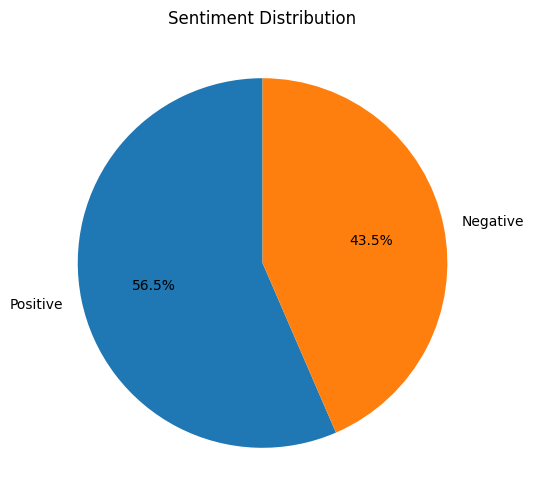

In [8]:
sent_dist = data["sentiment"].value_counts()

plt.figure(figsize=(6,6))
sent_dist.plot.pie(autopct="%.1f%%", startangle=90)
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()

# Sentiment Distribution

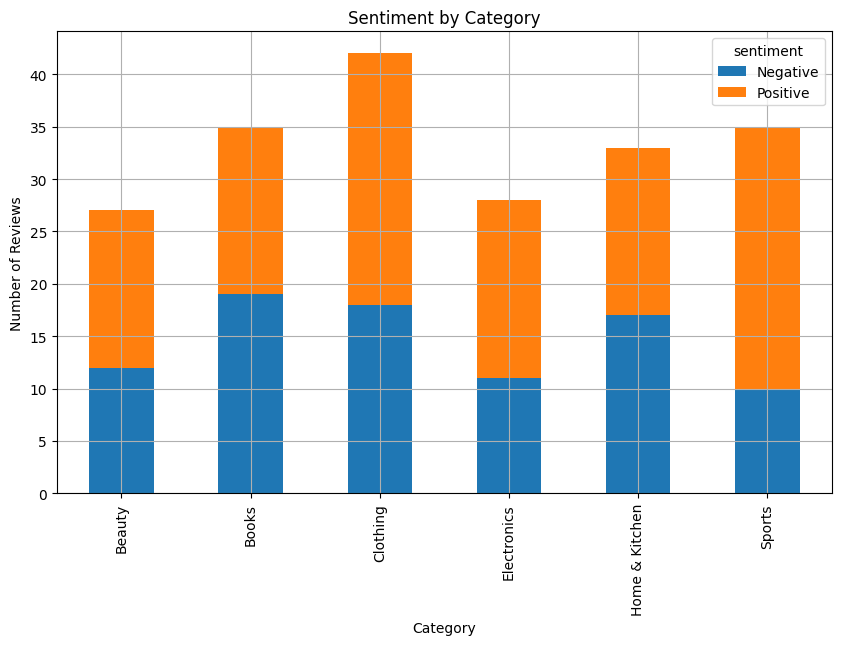

In [9]:
sent_by_cat = data.groupby(["categories","sentiment"]).size().unstack(fill_value=0)

sent_by_cat.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Sentiment by Category")
plt.xlabel("Category")
plt.ylabel("Number of Reviews")
plt.show()

# Average Rating by Category

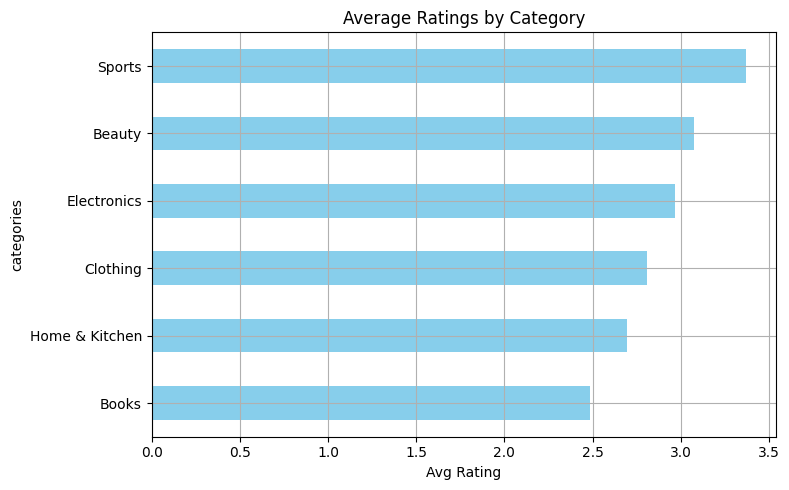

In [10]:
avg_rating = data.groupby("categories")["reviews.rating"].mean().sort_values()

avg_rating.plot(kind="barh", color="skyblue")
plt.title("Average Ratings by Category")
plt.xlabel("Avg Rating")
plt.tight_layout()
plt.show()

# Sentiment Trend Over Time

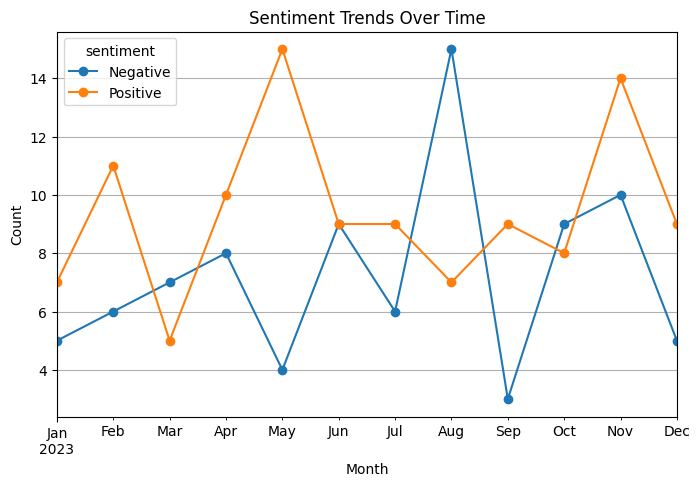

In [11]:
data["reviews.date"] = pd.to_datetime(data["reviews.date"], errors="coerce")

trend = data.groupby([data["reviews.date"].dt.to_period("M"), "sentiment"]).size().unstack(fill_value=0)
trend.index = trend.index.to_timestamp()

trend.plot(marker="o")
plt.title("Sentiment Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

In [12]:
# Numeric feature: review length (characters)
data["review_length"] = data["reviews.text"].str.len()

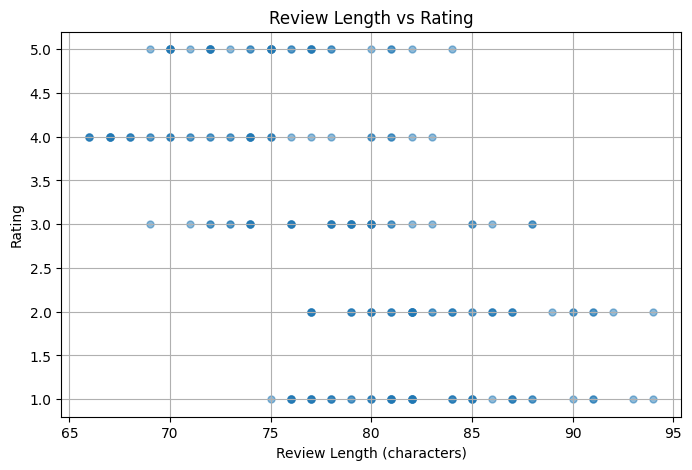

In [13]:
plt.scatter(data["review_length"], data["reviews.rating"], alpha=0.5, s=25)
plt.title("Review Length vs Rating")
plt.xlabel("Review Length (characters)")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

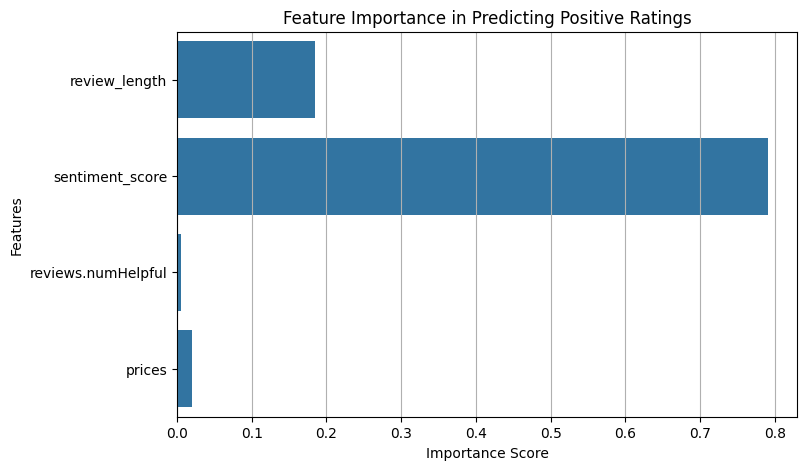

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Select the numeric features for modeling
X = data[["review_length", "sentiment_score", "reviews.numHelpful", "prices"]]
y = (data["reviews.rating"] > 3).astype(int)  # Positive rating target

rf = RandomForestClassifier(random_state=42, n_estimators=200)
rf.fit(X, y)

importances = rf.feature_importances_
feature_names = X.columns

sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Predicting Positive Ratings")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

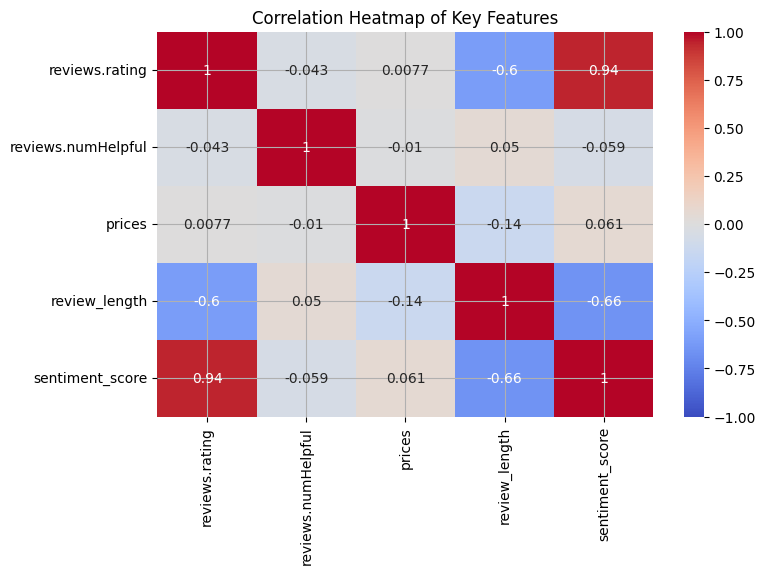

In [15]:
corr_features = ["reviews.rating", "reviews.numHelpful", "prices", "review_length", "sentiment_score"]
corr = data[corr_features].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Key Features")
plt.show()